In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC, SVR  
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('air quality data (1).csv')

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.shape

(29531, 16)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df1= df.dropna(subset=['AQI'],inplace=True)

In [9]:
df1= df.dropna(subset=['PM10'],inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False)

Xylene        10619
Toluene        5019
Benzene        2796
NH3            1972
NOx            1120
PM2.5           618
O3              488
SO2             470
CO              327
NO2             258
NO              254
City              0
Date              0
PM10              0
AQI               0
AQI_Bucket        0
dtype: int64

In [11]:
df.shape

(17764, 16)

In [12]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
PM2.5,17146.0,57.042317,51.127680,0.04,25.1325,43.180,69.9100,868.66
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,17510.0,17.947031,23.032986,0.03,5.3300,10.090,20.5975,390.68
NO2,17506.0,28.047373,23.003558,0.01,11.3100,22.470,38.1875,292.02
NOx,16644.0,33.728028,31.417092,0.00,13.6975,25.470,42.4225,378.24
NH3,15792.0,20.112356,17.338879,0.01,8.1600,14.560,27.0400,207.14
CO,17437.0,1.400954,3.563993,0.00,0.5300,0.830,1.2500,119.30
SO2,17294.0,13.314942,14.738372,0.01,5.9600,9.680,15.0300,186.08
O3,17276.0,34.903368,21.746886,0.01,19.2800,31.525,46.0875,257.73
Benzene,14968.0,3.709496,18.151843,0.00,0.3100,1.460,3.5300,455.03


In [13]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [14]:
null_values_percentage

Xylene        59.778203
Toluene       28.253772
Benzene       15.739698
NH3           11.101103
NOx            6.304886
PM2.5          3.478946
O3             2.747129
SO2            2.645800
CO             1.840802
NO2            1.452376
NO             1.429858
City           0.000000
Date           0.000000
PM10           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

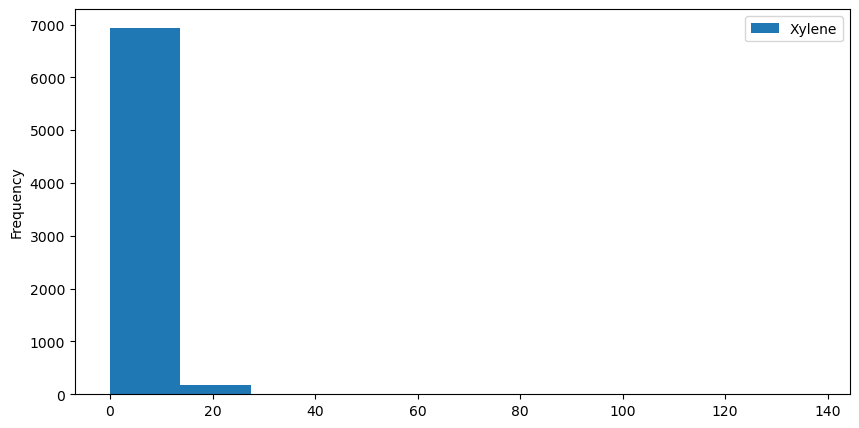

In [15]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

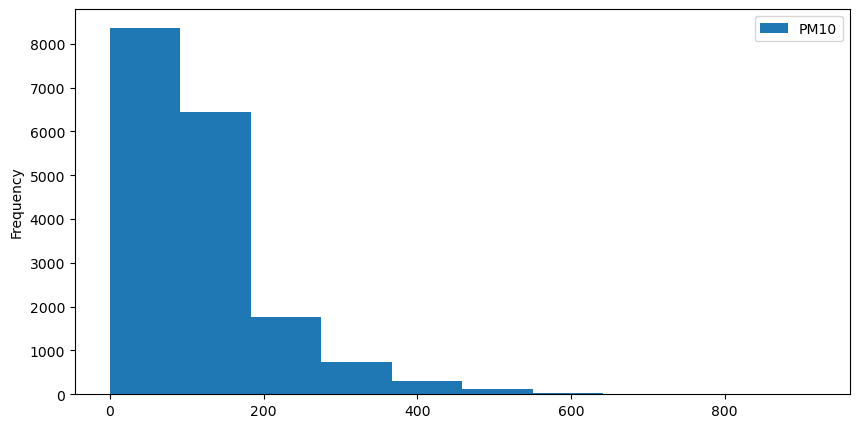

In [16]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

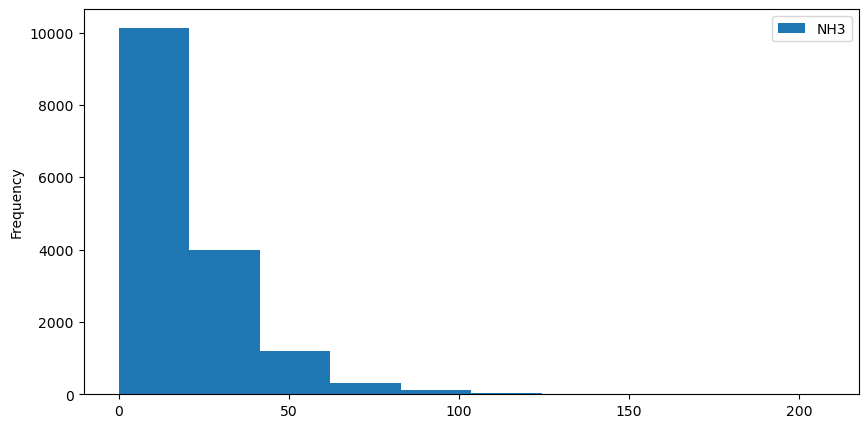

In [17]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

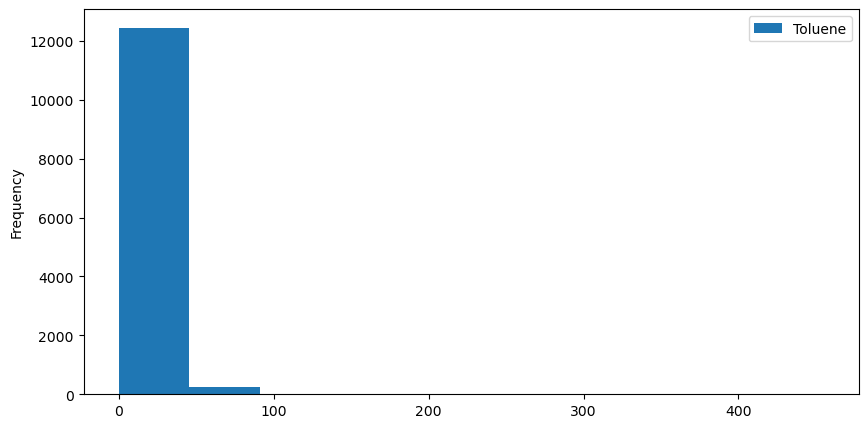

In [18]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

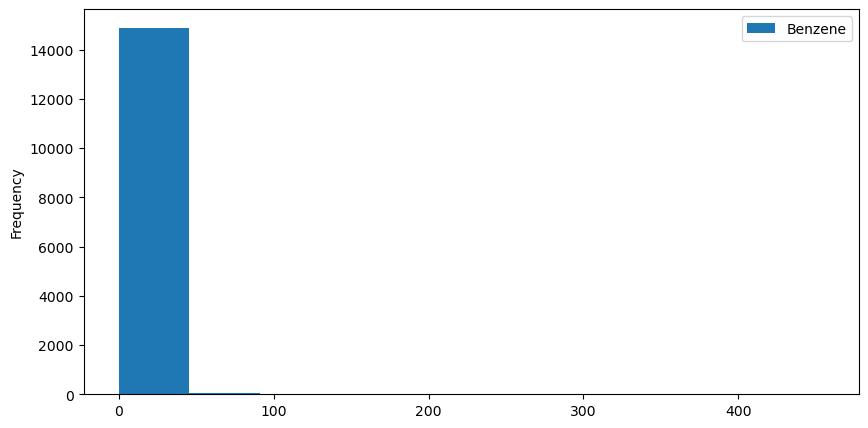

In [19]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

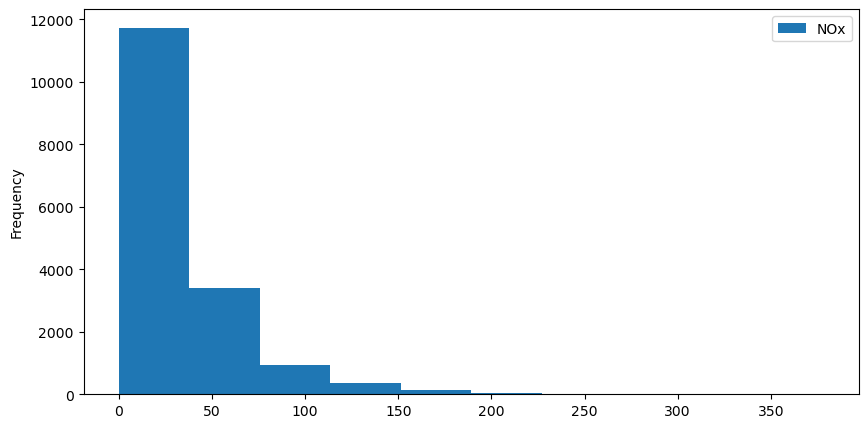

In [20]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

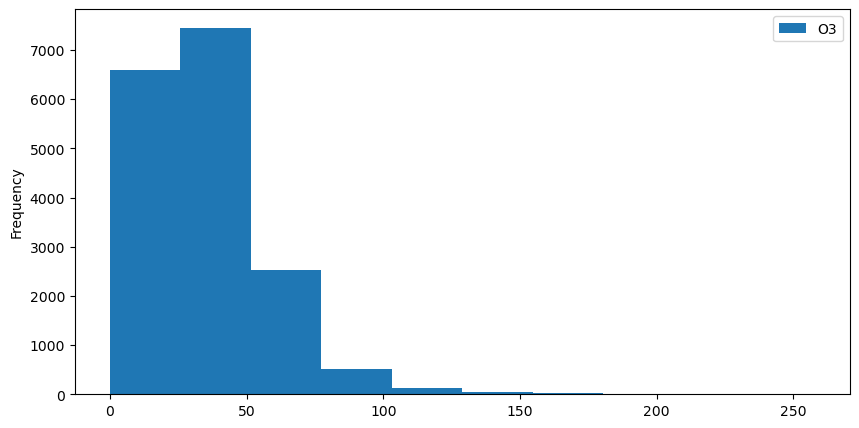

In [21]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

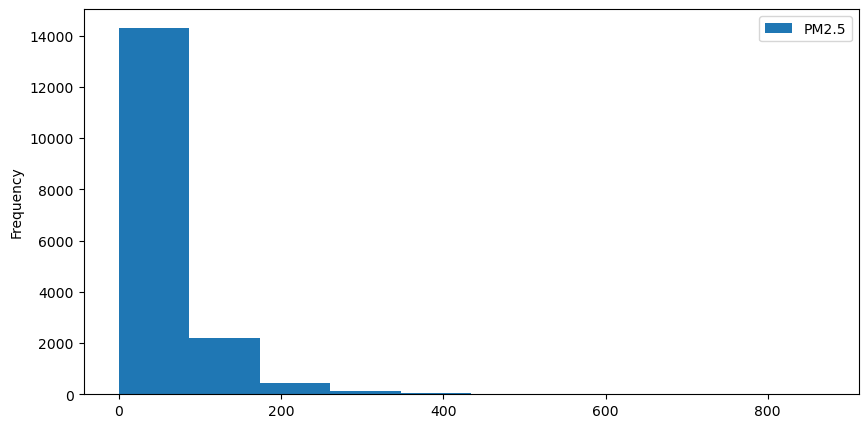

In [22]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

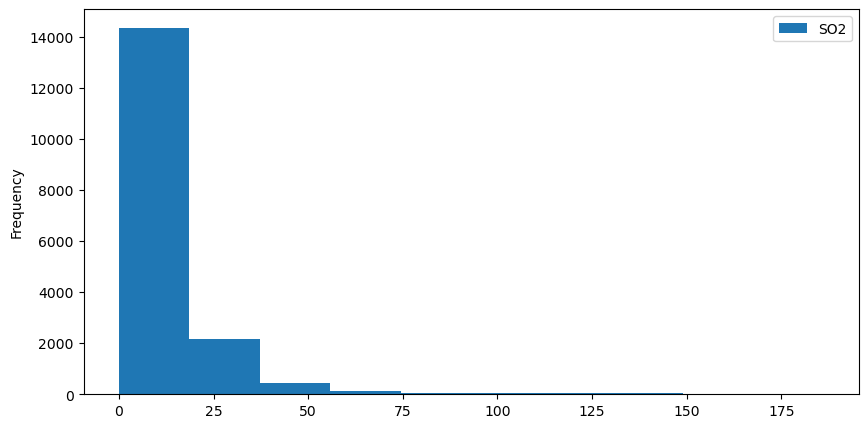

In [23]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

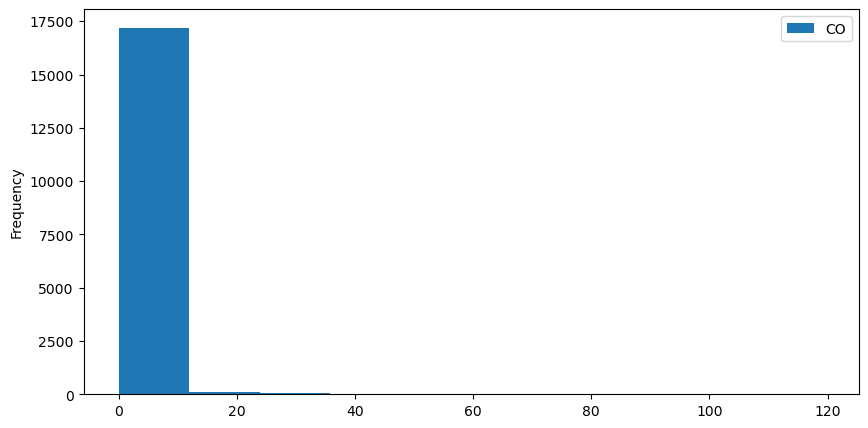

In [24]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

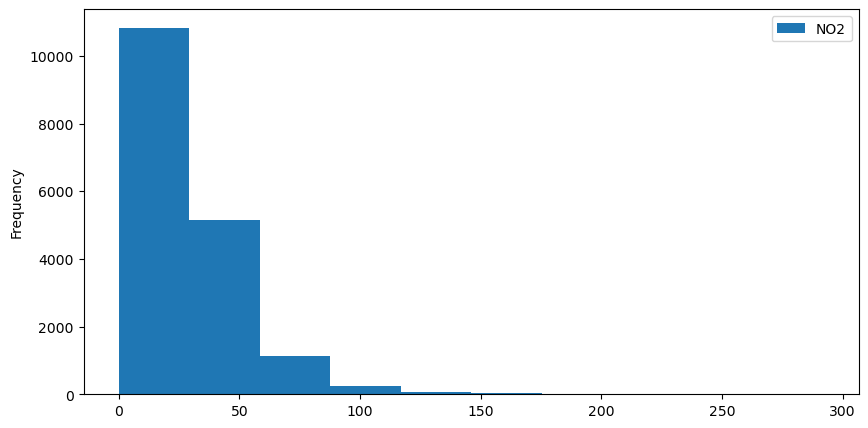

In [25]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

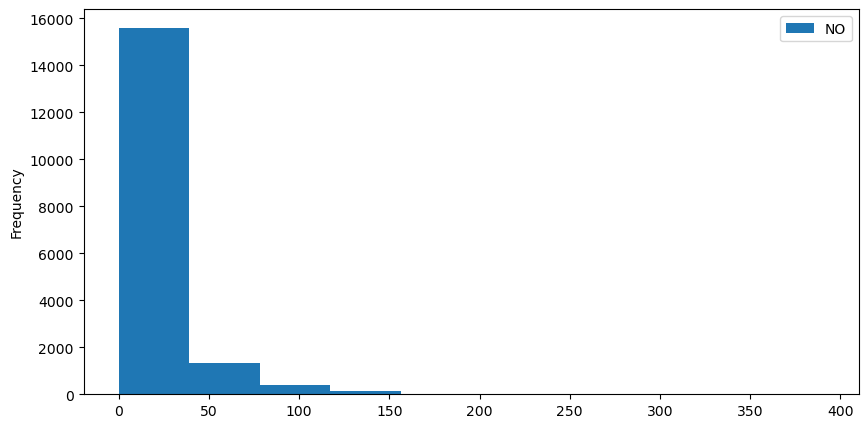

In [26]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

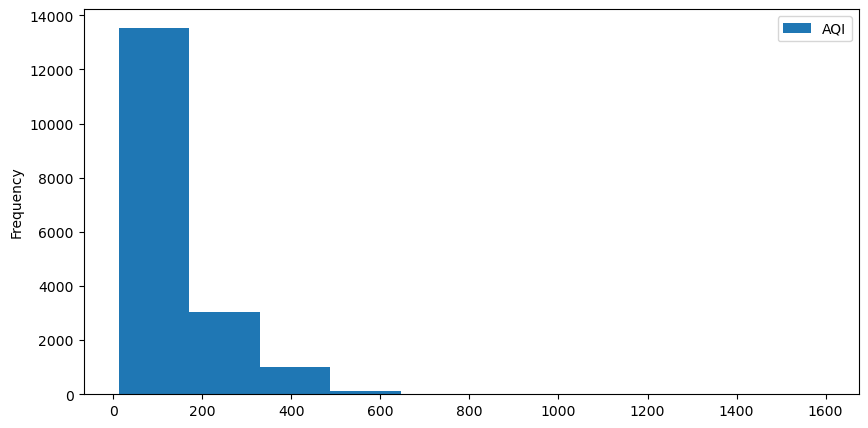

In [27]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

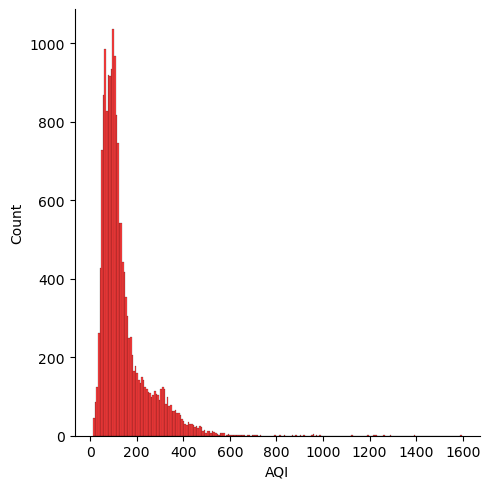

In [28]:
sns.displot(df, x="AQI", color="red")
plt.show()

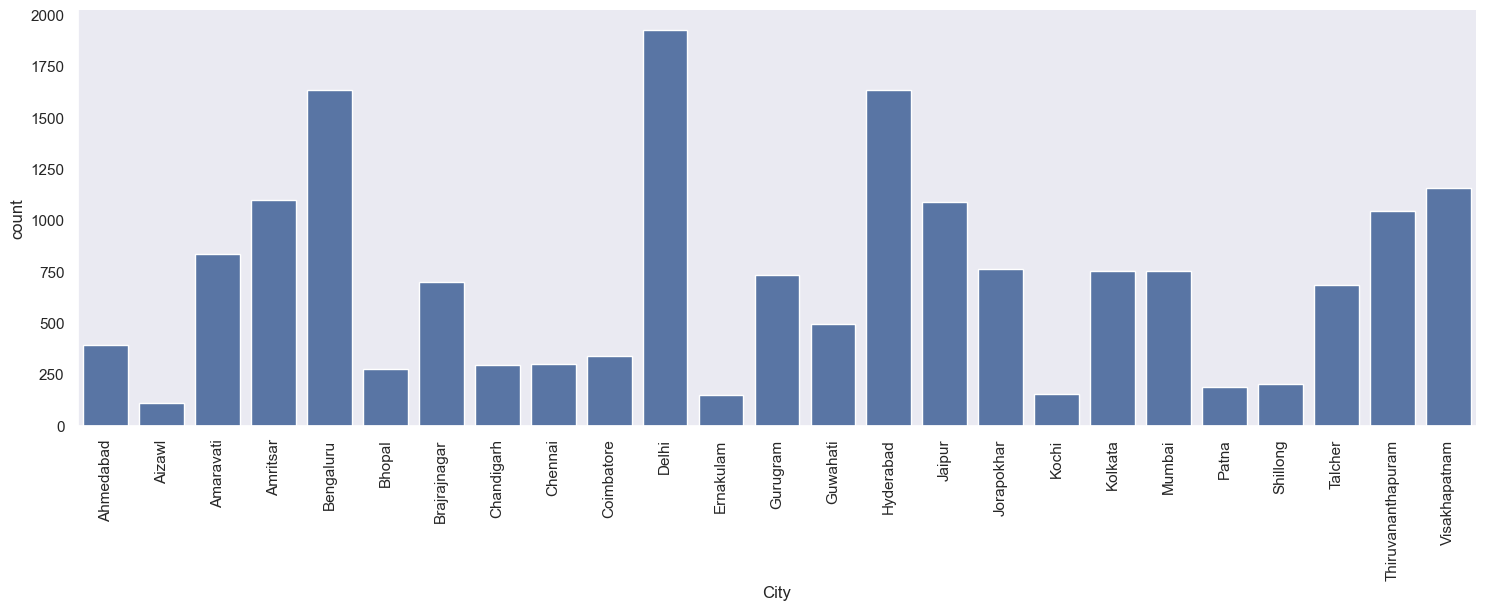

In [29]:
sns.set(style="dark")
graph=sns.catplot(x="City",kind="count",data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)

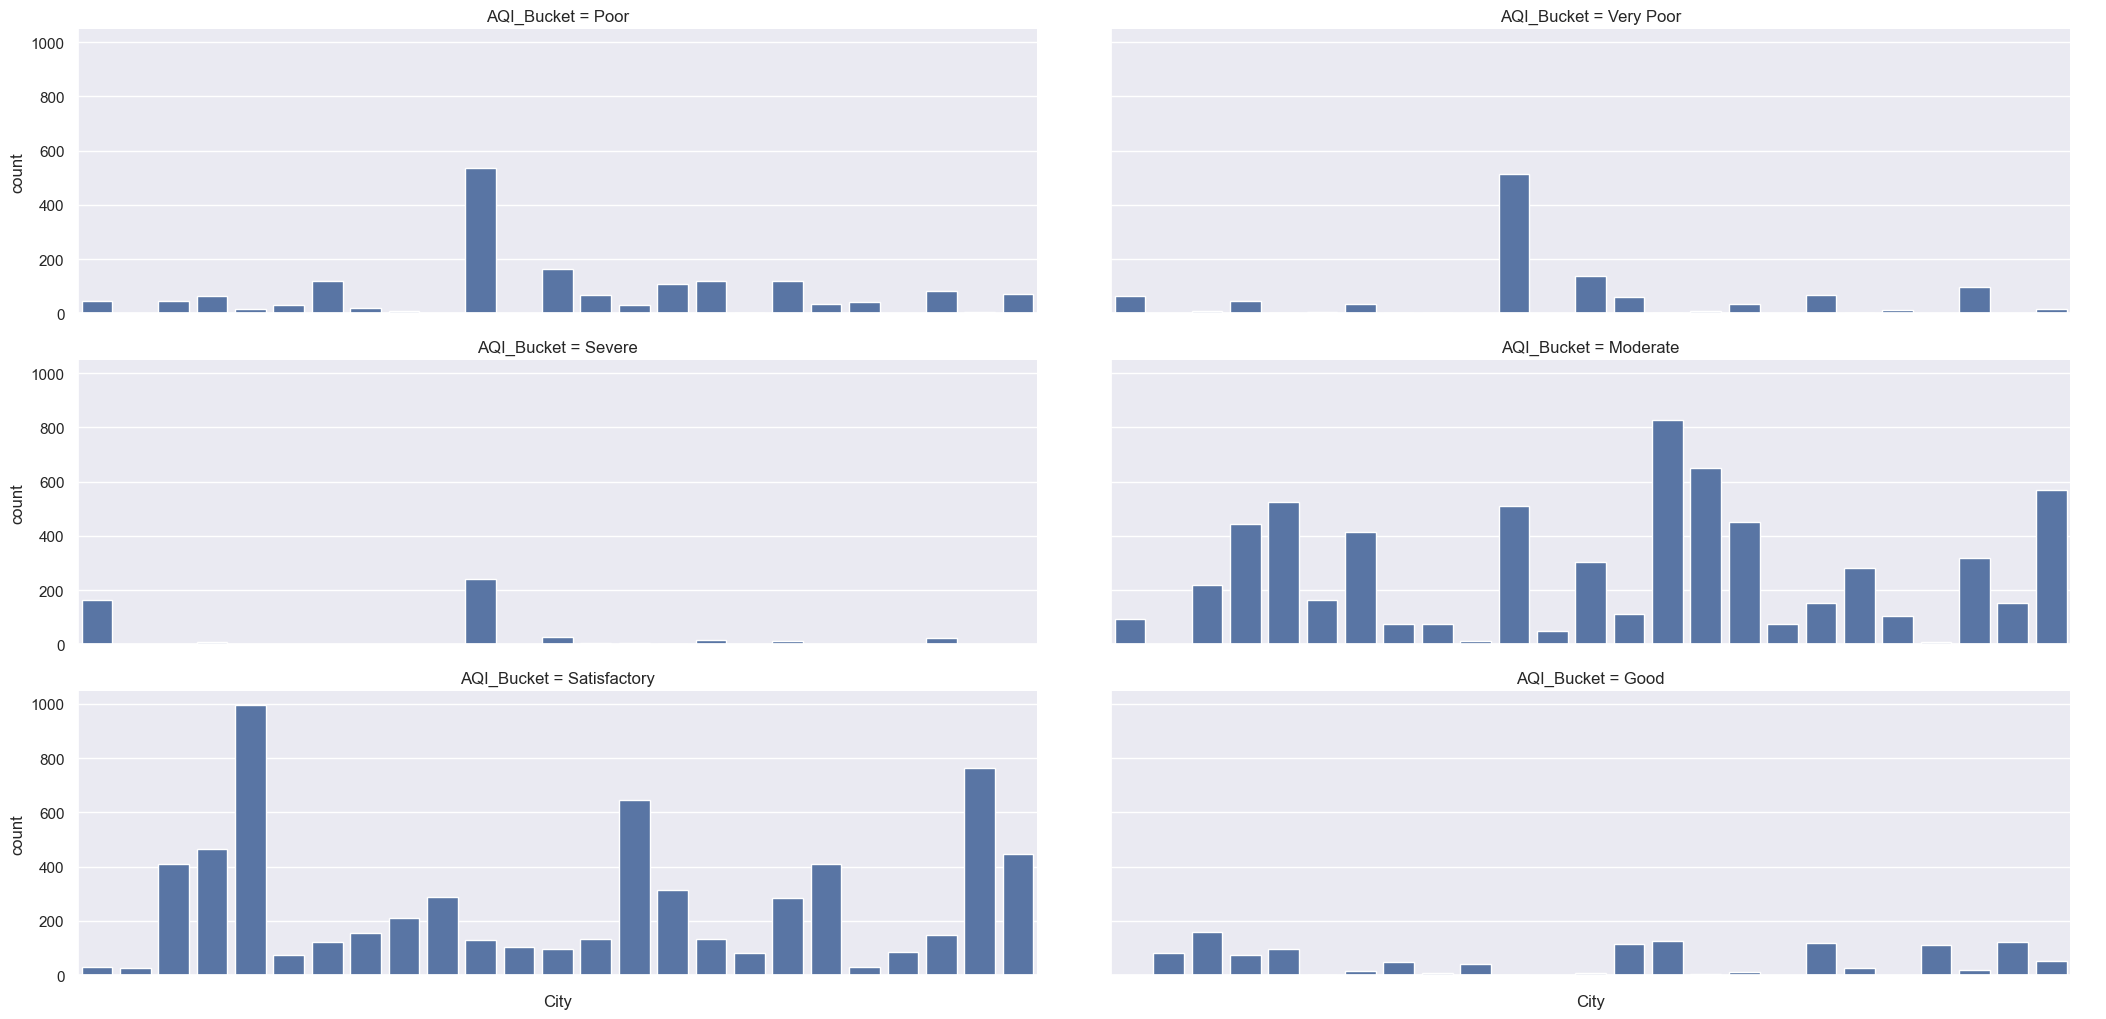

In [30]:
sns.set(style="darkgrid")
graph=sns.catplot(x="City",kind="count",data=df,col="AQI_Bucket",col_wrap=2,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)

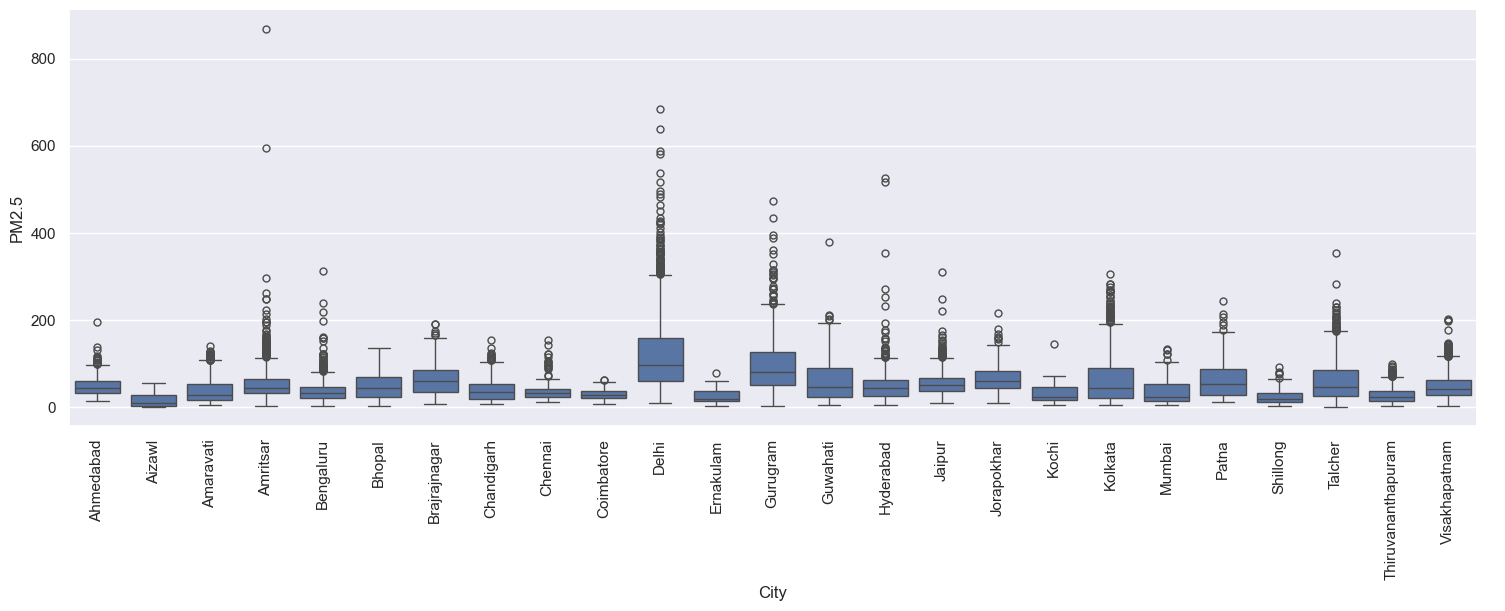

In [31]:
graph1=sns.catplot(x="City",y="PM2.5",kind="box",data=df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)

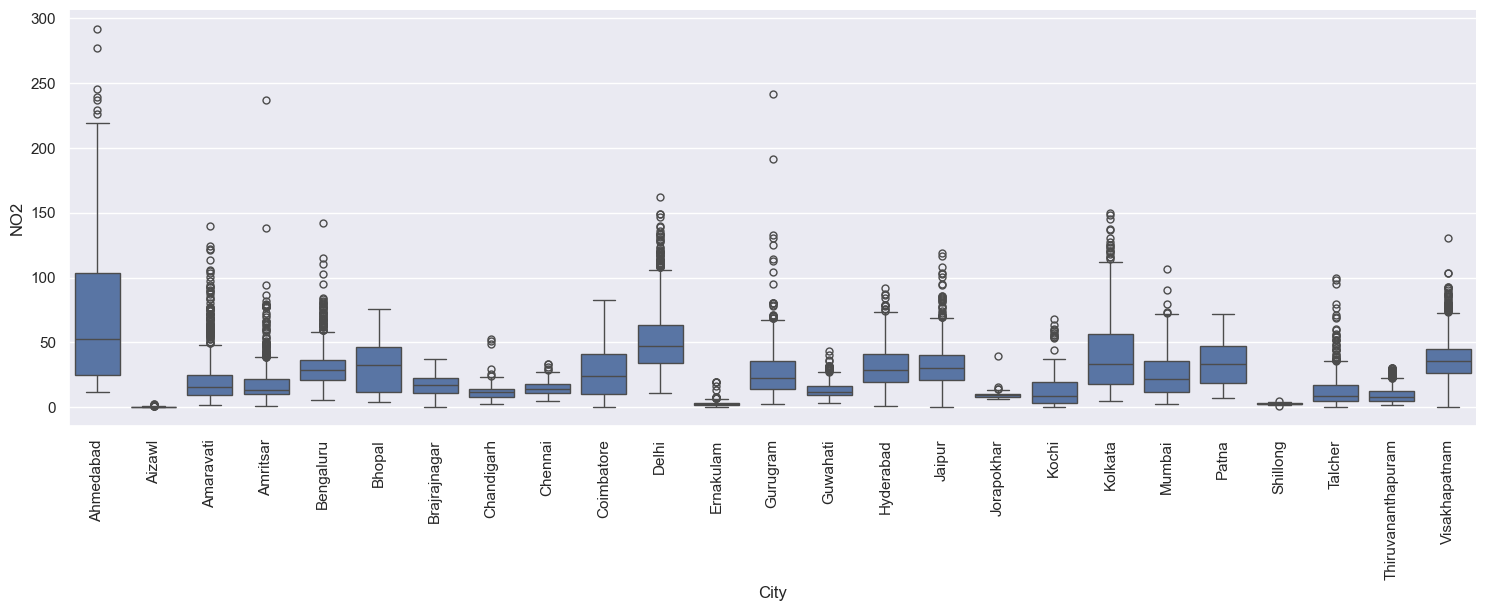

In [32]:
graph2=sns.catplot(x="City",y="NO2",kind="box",data=df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)

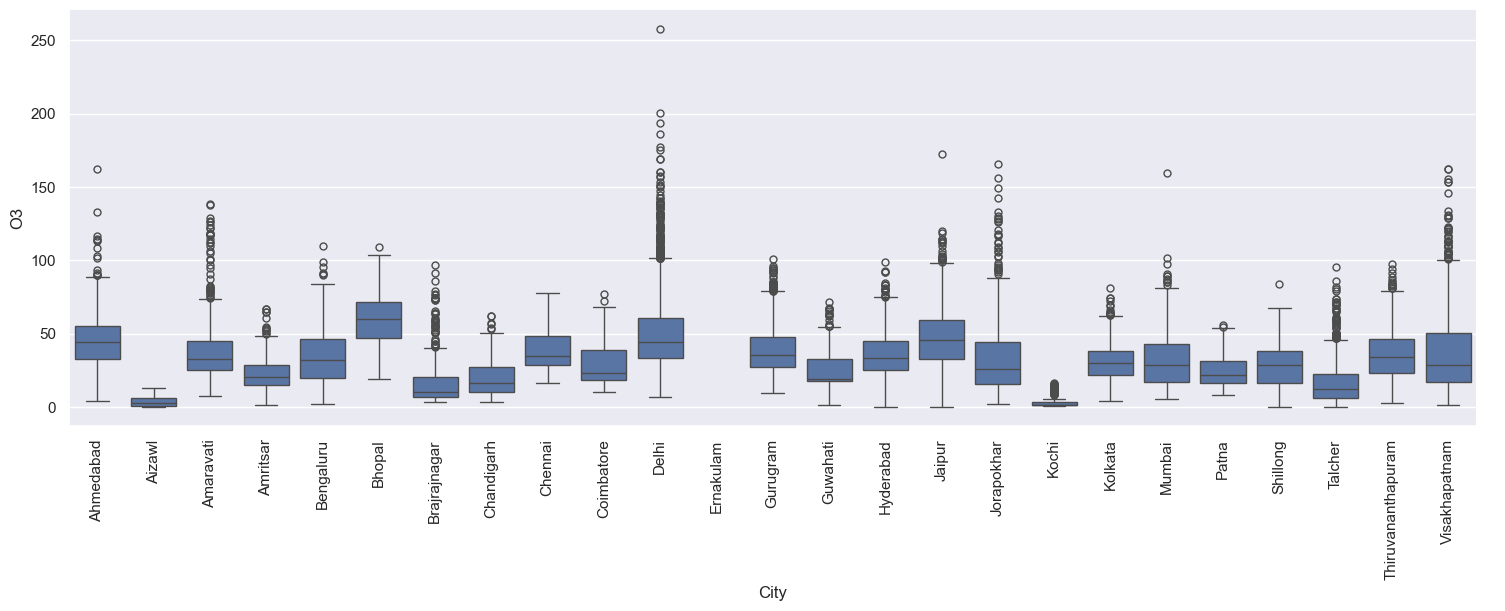

In [33]:
graph3=sns.catplot(x="City",y="O3",data=df,kind="box",height=5,aspect=3)
graph3.set_xticklabels(rotation=90)

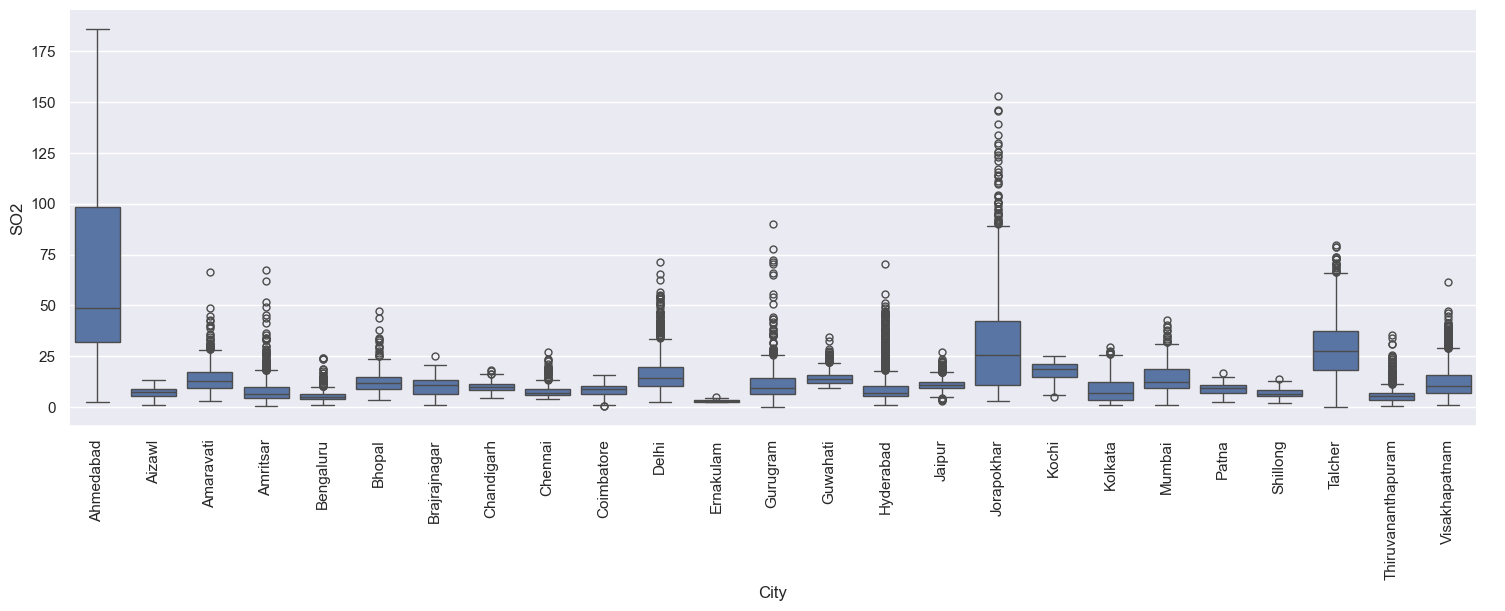

In [34]:
graph4=sns.catplot(x="City",y="SO2",data=df,kind="box",height=5,aspect=3)
graph4.set_xticklabels(rotation=90)

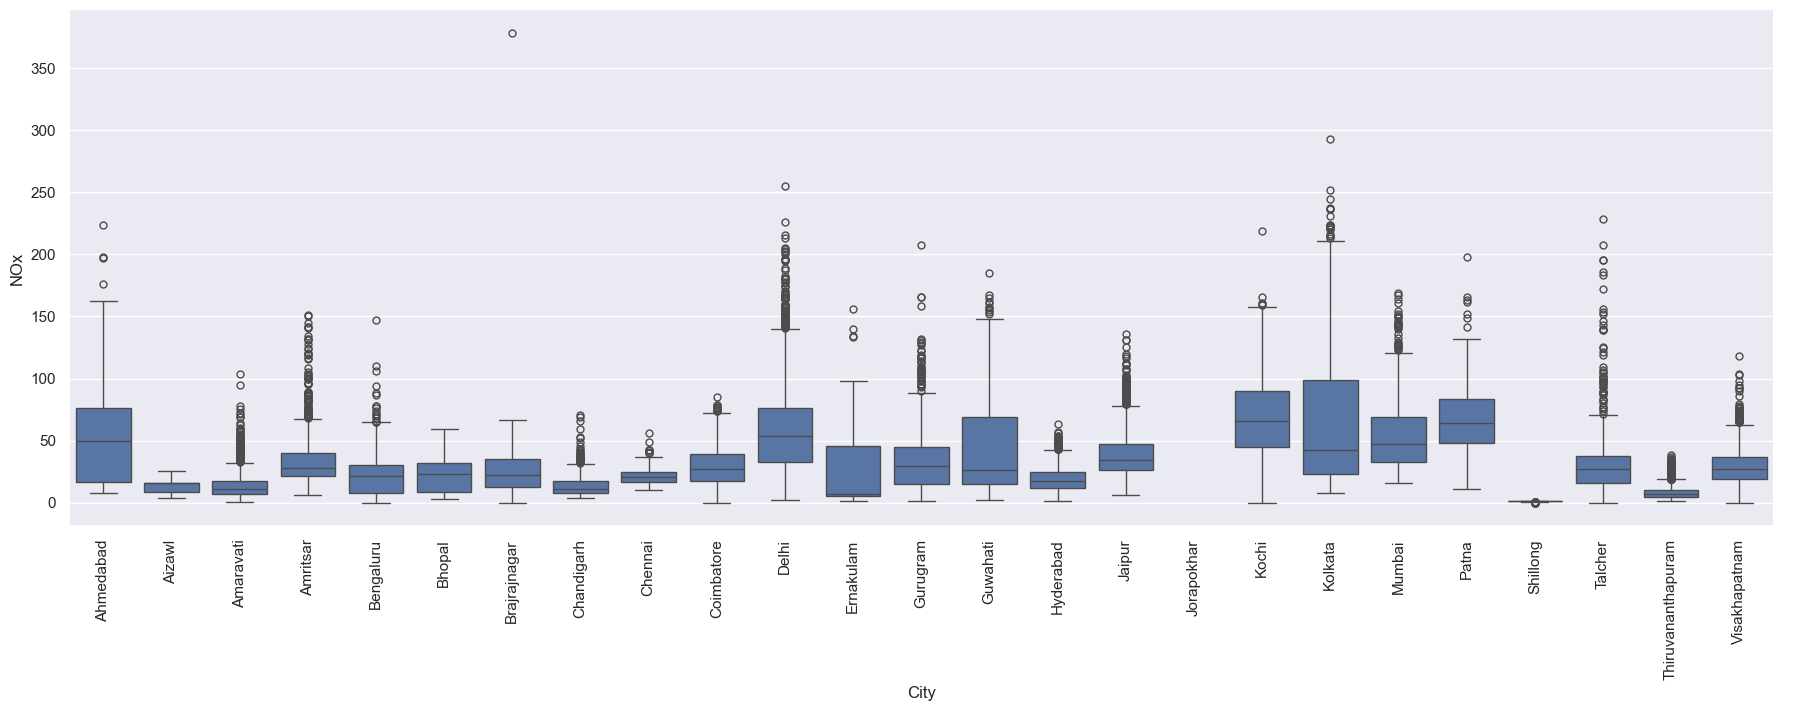

In [35]:
graph5=sns.catplot(data=df,kind="box",x="City",y="NOx",height=6,aspect=3)
graph5.set_xticklabels(rotation=90)

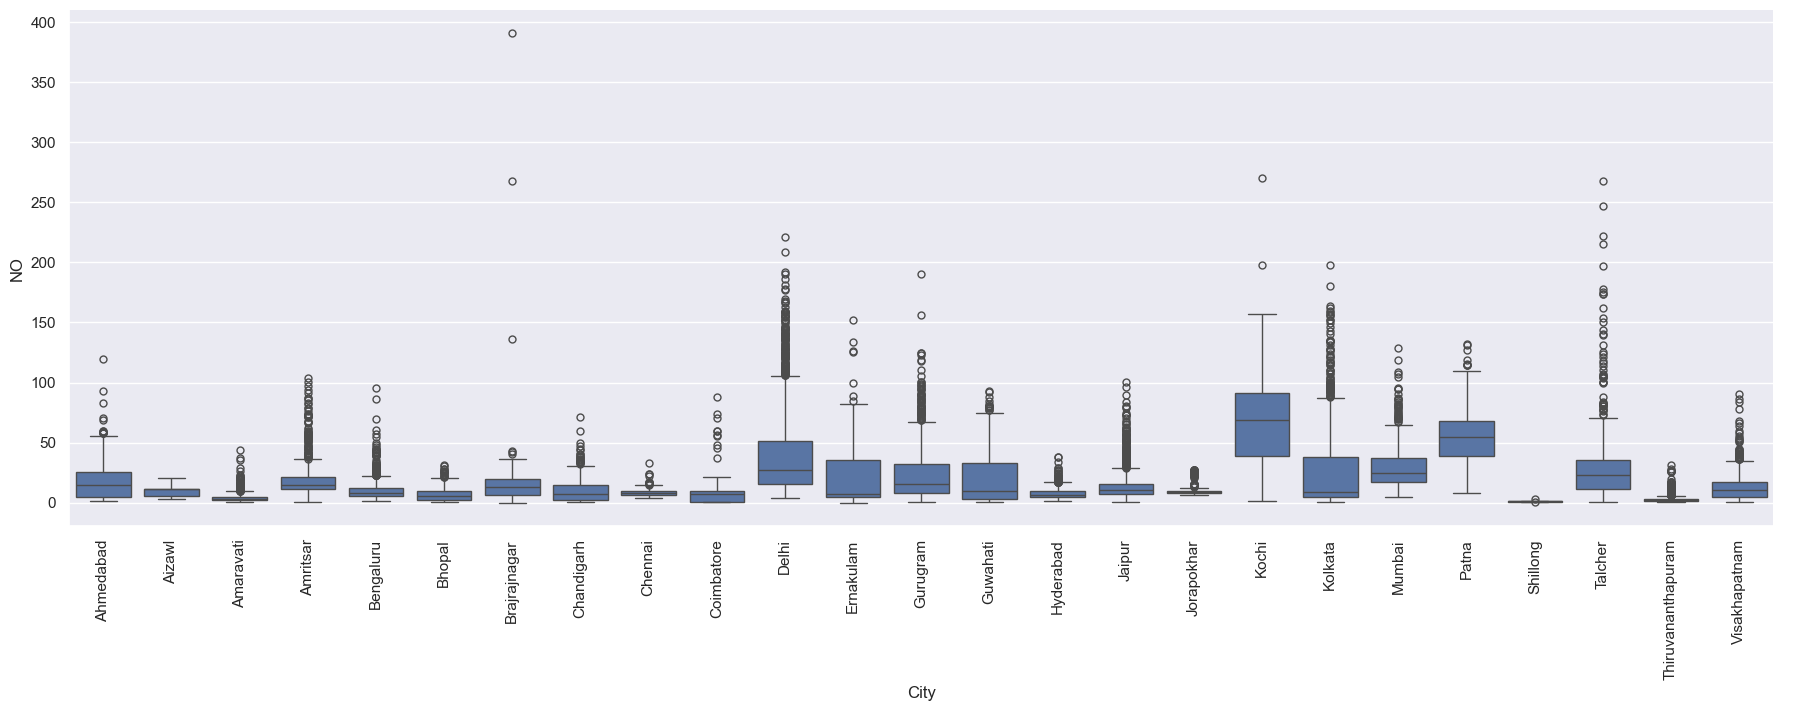

In [36]:
graph6=sns.catplot(data=df,kind="box",x="City",y="NO",height=6,aspect=3)
graph6.set_xticklabels(rotation=90)

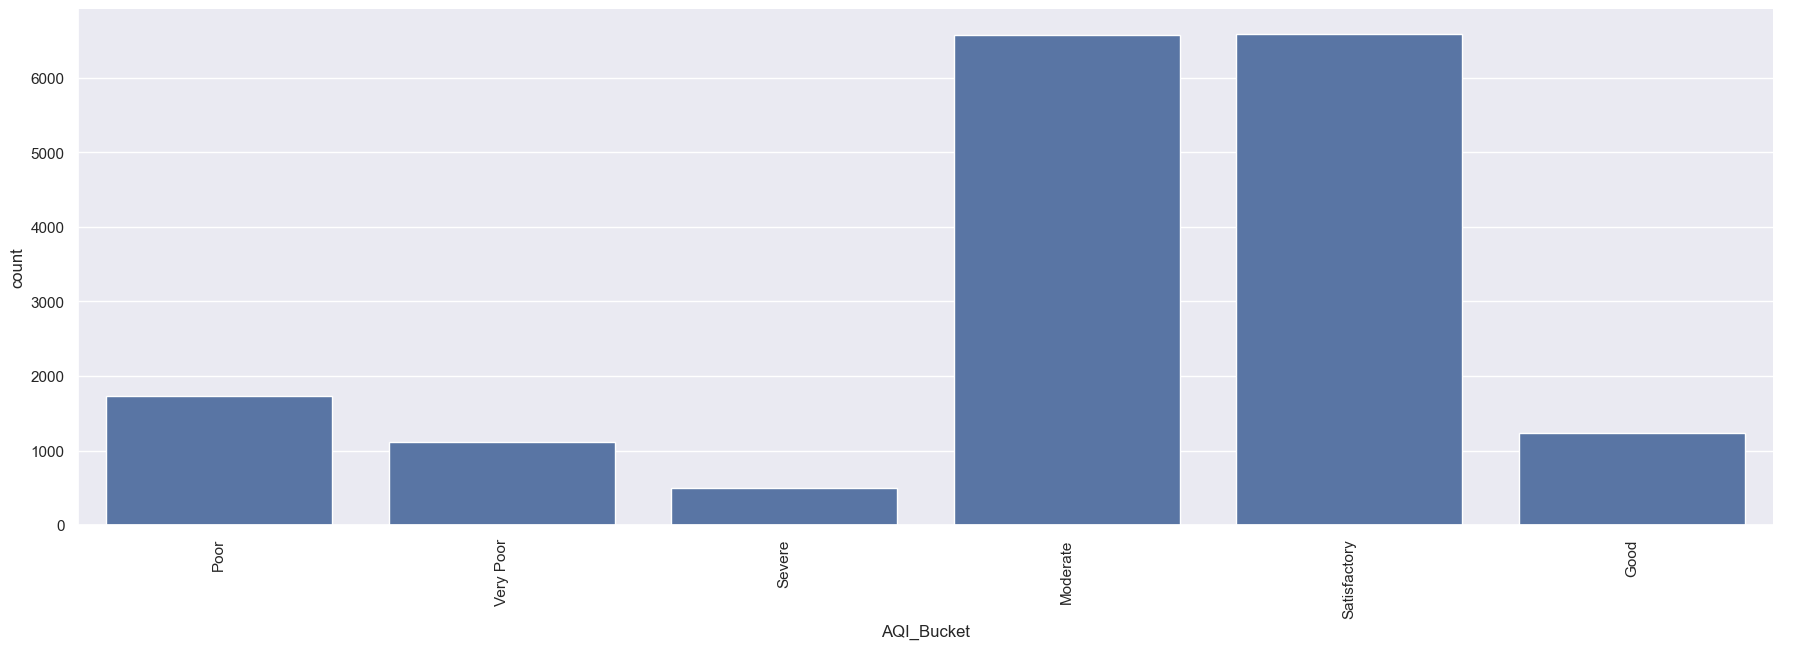

In [37]:
graph7=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)
graph7.set_xticklabels(rotation=90)

In [38]:
df.isnull().sum().sort_values(ascending=False)

Xylene        10619
Toluene        5019
Benzene        2796
NH3            1972
NOx            1120
PM2.5           618
O3              488
SO2             470
CO              327
NO2             258
NO              254
City              0
Date              0
PM10              0
AQI               0
AQI_Bucket        0
dtype: int64

In [39]:
df.describe().loc["mean"]

PM2.5       57.042317
PM10       118.454435
NO          17.947031
NO2         28.047373
NOx         33.728028
NH3         20.112356
CO           1.400954
SO2         13.314942
O3          34.903368
Benzene      3.709496
Toluene      9.387865
Xylene       2.848815
AQI        140.776571
Name: mean, dtype: float64

In [40]:
df = df.replace({

"PM2.5" : {np.nan:67.476613},
"PM10" :{np.nan:118.454435},
"NO": {np.nan:17.622421},
"NO2": {np.nan:28.978391},
"NOx": {np.nan:32.289012},
"NH3": {np.nan:23.848366},
"CO":  {np.nan:2.345267},
"SO2": {np.nan:34.912885},
"O3": {np.nan:38.320547},
"Benzene": {np.nan:3.458668},
"Toluene": {np.nan:9.525714},
"Xylene": {np.nan:3.588683}})


In [41]:
df.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

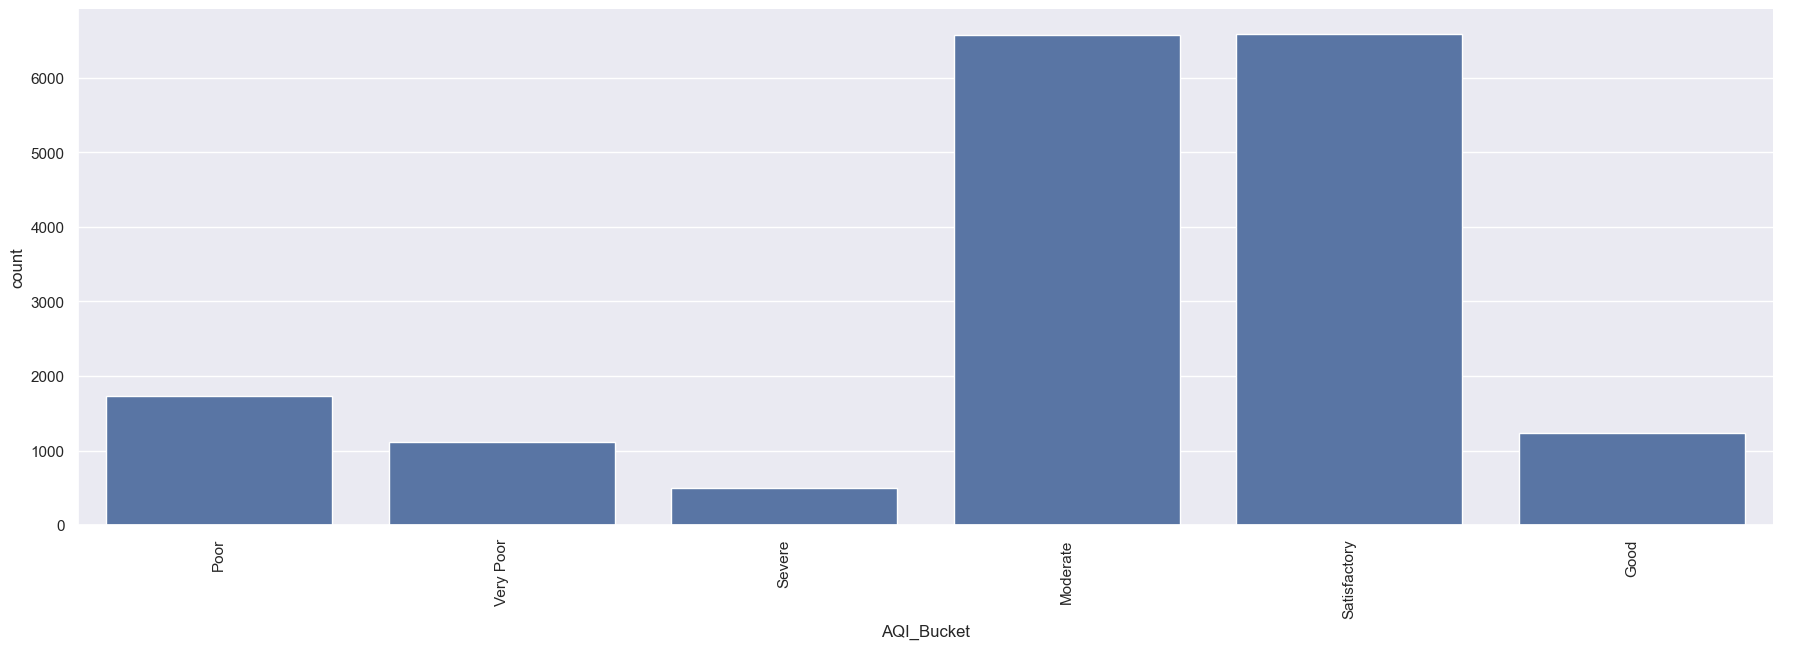

In [42]:
graph=sns.catplot(x="AQI_Bucket",data=df,kind="count",height=6,aspect=3)
graph.set_xticklabels(rotation=90)

In [43]:
df = df.drop(["AQI_Bucket"], axis=1)

In [44]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
1595,Ahmedabad,2019-05-15,37.55,122.41,15.08,85.12,58.72,23.848366,15.08,163.01,48.23,16.44,85.54,14.19,281.0
1596,Ahmedabad,2019-05-16,33.97,116.32,14.67,79.71,55.61,23.848366,14.67,91.26,51.86,15.55,83.89,13.15,330.0
1597,Ahmedabad,2019-05-17,35.48,130.07,18.02,77.61,58.41,23.848366,18.02,98.35,38.99,15.88,83.83,13.34,356.0
1598,Ahmedabad,2019-05-18,34.11,138.31,13.27,75.23,51.83,23.848366,13.27,88.66,42.22,15.93,82.73,13.44,359.0
1599,Ahmedabad,2019-05-19,33.69,111.73,34.56,68.90,69.77,23.848366,34.56,80.90,36.95,15.53,84.17,13.19,547.0


<Axes: >

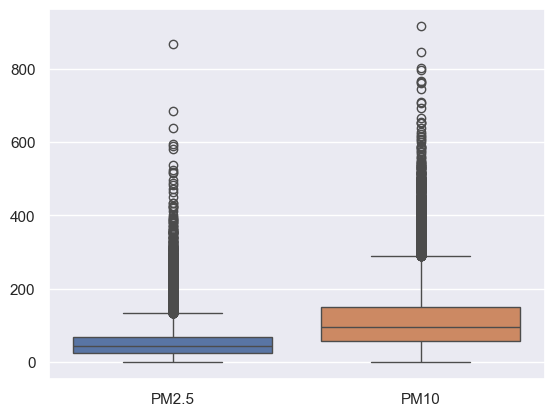

In [45]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

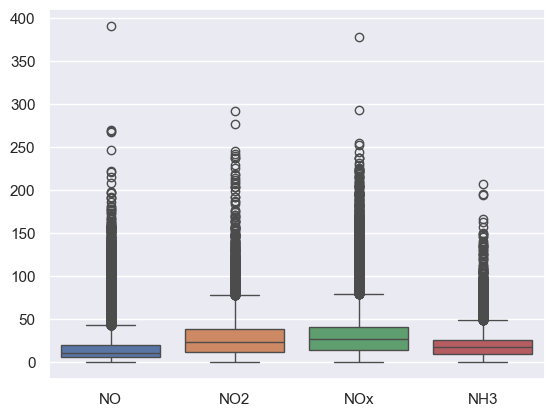

In [46]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

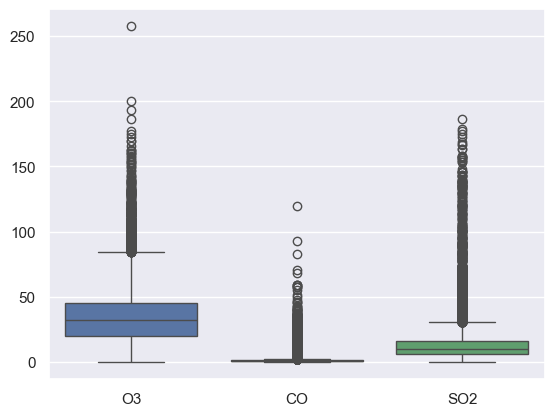

In [47]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

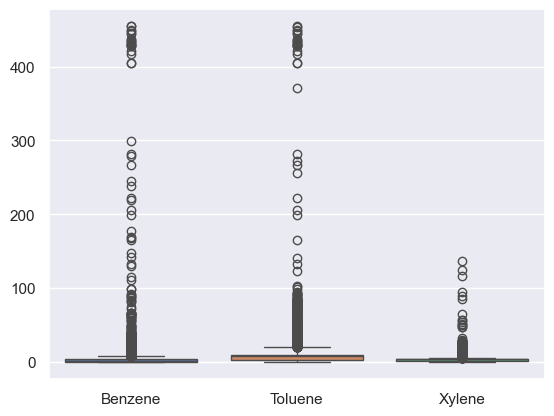

In [48]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

In [49]:
def replace_outliers_with_quartiles(df):
    
    for column in df.select_dtypes(include=['number']).columns: 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df 

df = replace_outliers_with_quartiles(df)

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,17764.0,48.680045,27.591496,0.04,25.7000,44.665000,68.710625,133.12
PM10,17764.0,105.338640,60.235533,0.03,56.7775,96.180000,150.180625,289.95
NO,17764.0,12.725250,9.230203,0.03,5.3900,10.230000,20.340625,42.76
NO2,17764.0,25.840621,16.974757,0.01,11.4100,22.880000,37.920000,77.63
NOx,17764.0,27.900414,17.254994,0.00,14.4700,27.070000,40.460625,79.36
NH3,17764.0,18.110470,10.899828,0.01,9.1000,16.950000,25.130000,49.16
CO,17764.0,0.915461,0.534436,0.00,0.5300,0.840000,1.290000,2.43
SO2,17764.0,10.900663,6.052369,0.01,6.0400,9.880000,15.810000,30.44
O3,17764.0,33.332288,17.620602,0.01,19.6200,32.170000,45.550000,84.34
Benzene,17764.0,2.225442,1.838045,0.00,0.4700,2.010000,3.458668,7.94


<Axes: >

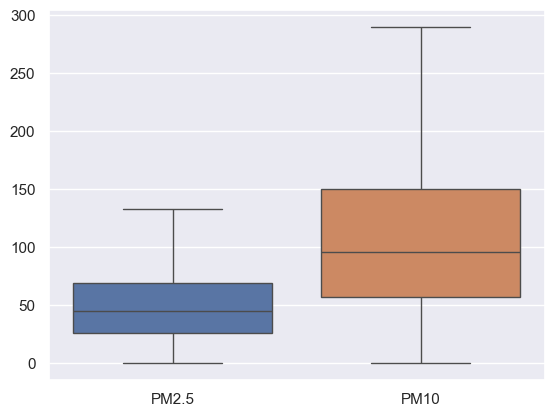

In [51]:
sns.boxplot(data=df[[ 'PM2.5', 'PM10']])

<Axes: >

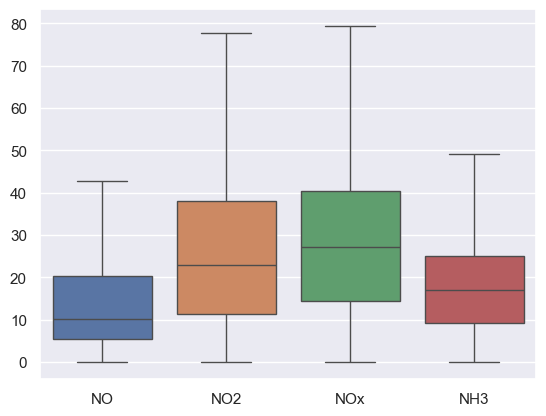

In [52]:
sns.boxplot(data=df[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

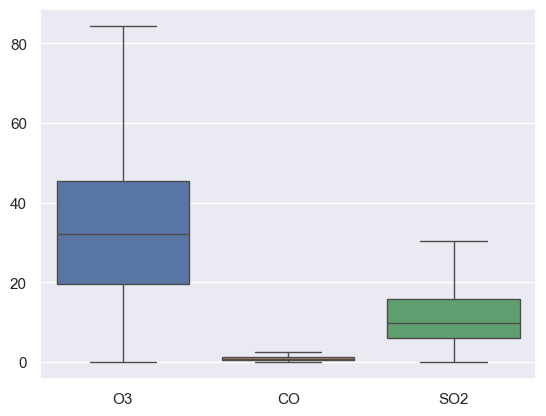

In [53]:
sns.boxplot(data=df[[ 'O3', 'CO', 'SO2']])

<Axes: >

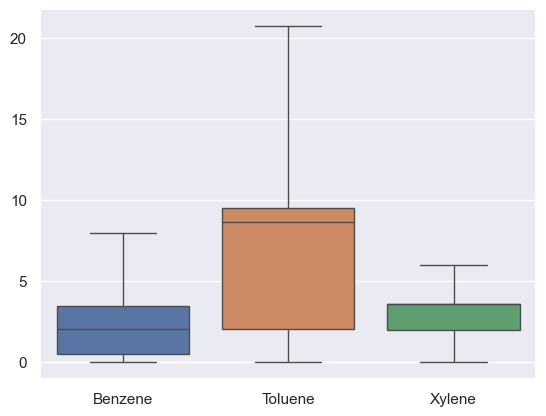

In [54]:
sns.boxplot(data=df[[ 'Benzene', 'Toluene', 'Xylene']])

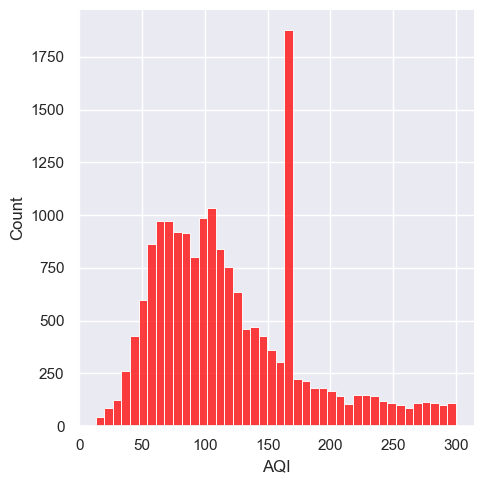

In [55]:
sns.displot(df, x="AQI", color="red")
plt.show()

In [56]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
1595,Ahmedabad,2019-05-15,37.55,122.41,15.08,37.92,58.72,23.848366,1.29,15.81,48.23,3.458668,9.525714,3.588683,281.0
1596,Ahmedabad,2019-05-16,33.97,116.32,14.67,37.92,55.61,23.848366,1.29,15.81,51.86,3.458668,9.525714,3.588683,165.0
1597,Ahmedabad,2019-05-17,35.48,130.07,18.02,77.61,58.41,23.848366,1.29,15.81,38.99,3.458668,9.525714,3.588683,165.0
1598,Ahmedabad,2019-05-18,34.11,138.31,13.27,75.23,51.83,23.848366,1.29,15.81,42.22,3.458668,9.525714,3.588683,165.0
1599,Ahmedabad,2019-05-19,33.69,111.73,34.56,68.90,69.77,23.848366,1.29,15.81,36.95,3.458668,9.525714,3.588683,165.0


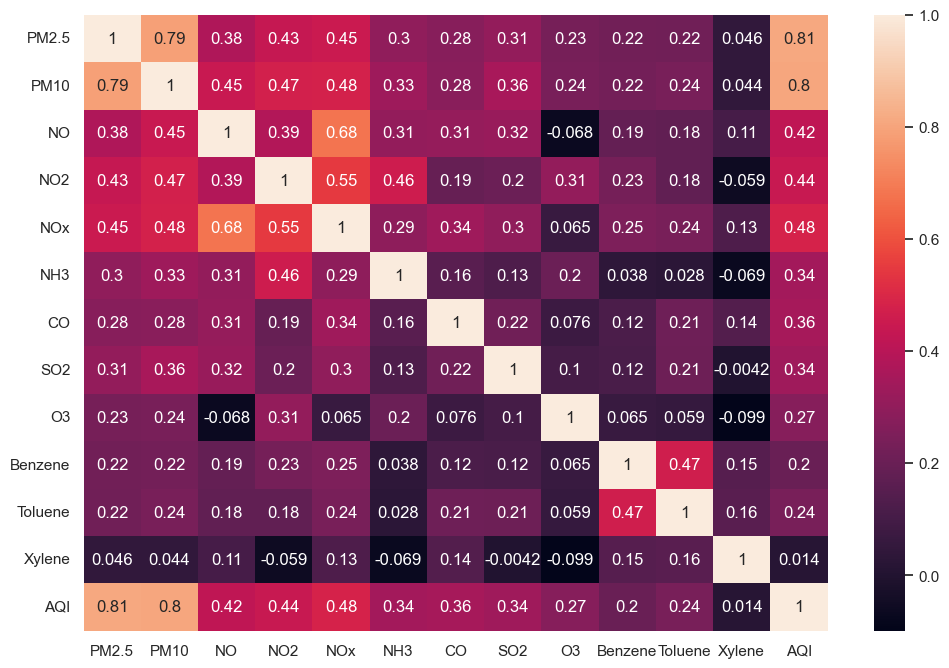

In [57]:
df1=df.drop(columns=['City','Date'])
plt.figure(figsize=(12, 8)) 
sns.heatmap(df1.corr(),annot=True) 
plt.show() 

In [58]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
1595,Ahmedabad,2019-05-15,37.55,122.41,15.08,37.92,58.72,23.848366,1.29,15.81,48.23,3.458668,9.525714,3.588683,281.0
1596,Ahmedabad,2019-05-16,33.97,116.32,14.67,37.92,55.61,23.848366,1.29,15.81,51.86,3.458668,9.525714,3.588683,165.0
1597,Ahmedabad,2019-05-17,35.48,130.07,18.02,77.61,58.41,23.848366,1.29,15.81,38.99,3.458668,9.525714,3.588683,165.0
1598,Ahmedabad,2019-05-18,34.11,138.31,13.27,75.23,51.83,23.848366,1.29,15.81,42.22,3.458668,9.525714,3.588683,165.0
1599,Ahmedabad,2019-05-19,33.69,111.73,34.56,68.90,69.77,23.848366,1.29,15.81,36.95,3.458668,9.525714,3.588683,165.0


In [59]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
1595,Ahmedabad,2019-05-15,37.55,122.41,15.08,37.92,58.72,23.848366,1.29,15.81,48.23,3.458668,9.525714,3.588683,281.0
1596,Ahmedabad,2019-05-16,33.97,116.32,14.67,37.92,55.61,23.848366,1.29,15.81,51.86,3.458668,9.525714,3.588683,165.0
1597,Ahmedabad,2019-05-17,35.48,130.07,18.02,77.61,58.41,23.848366,1.29,15.81,38.99,3.458668,9.525714,3.588683,165.0
1598,Ahmedabad,2019-05-18,34.11,138.31,13.27,75.23,51.83,23.848366,1.29,15.81,42.22,3.458668,9.525714,3.588683,165.0
1599,Ahmedabad,2019-05-19,33.69,111.73,34.56,68.90,69.77,23.848366,1.29,15.81,36.95,3.458668,9.525714,3.588683,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.0


In [60]:
df.drop(['Date'],axis=1,inplace=True)       
df.drop(['City'],axis=1,inplace=True)        

In [61]:
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)

In [62]:
df = pd.DataFrame(df1,columns = df.columns)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [64]:
x=df[["PM2.5","PM10","NO","NO2","NOx","NH3","CO","SO2","O3","Benzene","Toluene","Xylene"]]
y=df["AQI"]

In [65]:
y.head()

0    2.746131
1    0.766143
2    0.766143
3    0.766143
4    0.766143
Name: AQI, dtype: float64

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(14211, 12) (3553, 12) (14211,) (3553,)


In [67]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [68]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [69]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.4991928128910278
RMSE TestData =  0.4975607963646546
--------------------------------------------------
RSquared value on train: 0.7530252362576905
RSquared value on test: 0.7427224590784245


In [70]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [71]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [72]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  0.4991928128910278
RMSE TestData =  0.4975607963646546
--------------------------------------------------
RSquared value on train: 0.7530252362576905
RSquared value on test: 0.7427224590784245


In [73]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [74]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [75]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  8.204686622522428e-17
RMSE TestData =  0.5933027952844067
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.6341842865093377


In [76]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [77]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [78]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.15915655155372938
RMSE TestData =  0.41889901860402456
--------------------------------------------------
RSquared value on train: 0.9748947256256383
RSquared value on test: 0.8176405585371503


In [79]:
#applying svm to the project 
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
reg = SVR(kernel='linear')  
reg.fit(X_train_scaled, Y_train)

SVR(kernel='linear')

In [81]:
y_pred_test = reg.predict(X_test_scaled)
y_pred_train = reg.predict(X_train_scaled)

In [82]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,y_pred_train)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,y_pred_test)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',reg.score(X_train, Y_train))
print('RSquared value on test:',reg.score(X_test, Y_test))


RMSE TrainingData =  0.5061219086888898
RMSE TestData =  0.5021528023377616
--------------------------------------------------
RSquared value on train: 0.7473183965146757
RSquared value on test: 0.7389738991691137


In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation Heatmap')
plt.show()

From the above observations we can see R-squared value is maximum and optimal in Randoom forest algorithm .The SVM and decision tree classifier produces same R sqaured values So we can say both produces similar results.In SVM we noticed that the train and test are divided 50%.